# Exploratory Data Analysis

#### This file contains the Exploratory Data Analysis of the Food.com dataset that I plan to use in my diet recommendation app

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/Users/ignacyruszkowski/Desktop/programowanie/python/Diet/diet-recommendation-app/data/recipes.csv')
df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [5]:
# Basic dataset information
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())
print("\nMissing values percentage:")
print((df.isnull().sum() / len(df)) * 100)

# Descriptive statistics
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

# Unique values in categorical columns
print("\nUnique values in key categorical columns:")
print("Recipe Categories:", df['RecipeCategory'].nunique())
print("Authors:", df['AuthorId'].nunique())

# Value counts for important categorical columns
print("\nTop 10 Recipe Categories:")
print(df['RecipeCategory'].value_counts().head(10))

# Nutritional content analysis
nutrition_cols = ['Calories', 'FatContent', 'ProteinContent', 'CarbohydrateContent', 'SodiumContent']
print("\nNutritional content ranges:")
for col in nutrition_cols:
    print(f"{col}: Min={df[col].min():.1f}, Max={df[col].max():.1f}, Mean={df[col].mean():.1f}")

# Check for outliers in key numerical columns
print("\nPotential outliers (values > 99th percentile):")
for col in nutrition_cols:
    p99 = df[col].quantile(0.99)
    outliers = (df[col] > p99).sum()
    print(f"{col}: {outliers} recipes above 99th percentile ({p99:.1f})")

# Rating analysis
print("\nRating distribution:")
print(df['AggregatedRating'].value_counts().sort_index())

Dataset shape: (522517, 28)

Data types:
RecipeId                        int64
Name                           object
AuthorId                        int64
AuthorName                     object
CookTime                       object
PrepTime                       object
TotalTime                      object
DatePublished                  object
Description                    object
Images                         object
RecipeCategory                 object
Keywords                       object
RecipeIngredientQuantities     object
RecipeIngredientParts          object
AggregatedRating              float64
ReviewCount                   float64
Calories                      float64
FatContent                    float64
SaturatedFatContent           float64
CholesterolContent            float64
SodiumContent                 float64
CarbohydrateContent           float64
FiberContent                  float64
SugarContent                  float64
ProteinContent                float64
RecipeSer

In [6]:
# Count NA entries for all columns
print("Missing values (NA) count for all columns:")
print("-" * 50)
na_counts = df.isnull().sum()
for column, count in na_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{column}: {count} ({percentage:.2f}%)")

print(f"\nTotal columns: {len(df.columns)}")
print(f"Columns with missing values: {(na_counts > 0).sum()}")
print(f"Columns with no missing values: {(na_counts == 0).sum()}")

Missing values (NA) count for all columns:
--------------------------------------------------
RecipeId: 0 (0.00%)
Name: 0 (0.00%)
AuthorId: 0 (0.00%)
AuthorName: 0 (0.00%)
CookTime: 82545 (15.80%)
PrepTime: 0 (0.00%)
TotalTime: 0 (0.00%)
DatePublished: 0 (0.00%)
Description: 5 (0.00%)
Images: 1 (0.00%)
RecipeCategory: 751 (0.14%)
Keywords: 17237 (3.30%)
RecipeIngredientQuantities: 3 (0.00%)
RecipeIngredientParts: 0 (0.00%)
AggregatedRating: 253223 (48.46%)
ReviewCount: 247489 (47.36%)
Calories: 0 (0.00%)
FatContent: 0 (0.00%)
SaturatedFatContent: 0 (0.00%)
CholesterolContent: 0 (0.00%)
SodiumContent: 0 (0.00%)
CarbohydrateContent: 0 (0.00%)
FiberContent: 0 (0.00%)
SugarContent: 0 (0.00%)
ProteinContent: 0 (0.00%)
RecipeServings: 182911 (35.01%)
RecipeYield: 348071 (66.61%)
RecipeInstructions: 0 (0.00%)

Total columns: 28
Columns with missing values: 10
Columns with no missing values: 18


### First plotting the results we noticed there is a big number of outliers which we remove below

There seemed to be about 1% of observations which were outliers in each numerical category, which we remove safely. It is visible in the graphs below that there were significant improvements in the visibility of the data.

In [7]:
# Count outliers in each numerical category using 99th percentile threshold
print("=== OUTLIER ANALYSIS (Values > 99th Percentile) ===")
print("-" * 60)

numerical_cols = ['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 
                 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

outlier_summary = {}

for col in numerical_cols:
    p99 = df[col].quantile(0.99)
    outlier_count = (df[col] > p99).sum()
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary[col] = {
        'count': outlier_count,
        'percentage': outlier_percentage,
        'threshold': p99
    }
    
    print(f"{col}:")
    print(f"  99th percentile threshold: {p99:.2f}")
    print(f"  Outliers: {outlier_count:,} recipes ({outlier_percentage:.2f}%)")
    print()

# Summary table
print("=== OUTLIER SUMMARY TABLE ===")
print(f"{'Category':<20} {'Outliers':<10} {'Percentage':<12} {'Threshold':<12}")
print("-" * 60)
for col, stats in outlier_summary.items():
    print(f"{col:<20} {stats['count']:<10} {stats['percentage']:<12.2f} {stats['threshold']:<12.2f}")

# Find recipes that are outliers in multiple categories
print(f"\n=== RECIPES WITH MULTIPLE OUTLIER CATEGORIES ===")
outlier_columns = []
for col in numerical_cols:
    outlier_columns.append(df[col] > df[col].quantile(0.99))

outlier_df = pd.DataFrame(outlier_columns).T
outlier_df.columns = numerical_cols
outlier_counts_per_recipe = outlier_df.sum(axis=1)

print(f"Recipes that are outliers in multiple categories:")
for i in range(1, len(numerical_cols) + 1):
    count = (outlier_counts_per_recipe == i).sum()
    if count > 0:
        print(f"  {i} categories: {count:,} recipes")

=== OUTLIER ANALYSIS (Values > 99th Percentile) ===
------------------------------------------------------------
Calories:
  99th percentile threshold: 3642.67
  Outliers: 5,226 recipes (1.00%)

FatContent:
  99th percentile threshold: 208.10
  Outliers: 5,225 recipes (1.00%)

SaturatedFatContent:
  99th percentile threshold: 84.90
  Outliers: 5,222 recipes (1.00%)

CholesterolContent:
  99th percentile threshold: 684.48
  Outliers: 5,226 recipes (1.00%)

SodiumContent:
  99th percentile threshold: 5569.08
  Outliers: 5,226 recipes (1.00%)

CarbohydrateContent:
  99th percentile threshold: 476.60
  Outliers: 5,225 recipes (1.00%)

FiberContent:
  99th percentile threshold: 27.10
  Outliers: 5,204 recipes (1.00%)

SugarContent:
  99th percentile threshold: 299.70
  Outliers: 5,222 recipes (1.00%)

ProteinContent:
  99th percentile threshold: 95.60
  Outliers: 5,225 recipes (1.00%)

=== OUTLIER SUMMARY TABLE ===
Category             Outliers   Percentage   Threshold   
------------------

In [38]:
# Remove outliers from the dataset based on 99th percentile threshold
print("=== REMOVING OUTLIERS FROM DATASET ===")
print("-" * 50)

# Create a copy of the original dataset for comparison
df_original = df.copy()
print(f"Original dataset size: {len(df_original):,} recipes")

# Identify outliers using 99th percentile threshold for each numerical column
outlier_mask = pd.Series([False] * len(df), index=df.index)

for col in numerical_cols:
    p99 = df[col].quantile(0.99)
    col_outliers = df[col] > p99
    outlier_mask = outlier_mask | col_outliers
    print(f"{col}: {col_outliers.sum():,} outliers removed (>{p99:.2f})")

# Remove outliers
df = df[~outlier_mask]

print(f"\nDataset size after removing outliers: {len(df):,} recipes")
print(f"Total outliers removed: {outlier_mask.sum():,} recipes ({(outlier_mask.sum()/len(df_original)*100):.2f}%)")
print(f"Percentage of data retained: {(len(df)/len(df_original)*100):.2f}%")

# Display new statistics for key columns
print("\n=== UPDATED DATASET STATISTICS ===")
for col in ['Calories', 'ProteinContent', 'FatContent']:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  99th percentile: {df[col].quantile(0.99):.2f}")

=== REMOVING OUTLIERS FROM DATASET ===
--------------------------------------------------
Original dataset size: 502,510 recipes
Calories: 5,025 outliers removed (>1746.60)
FatContent: 5,020 outliers removed (>109.40)
SaturatedFatContent: 5,007 outliers removed (>45.80)
CholesterolContent: 5,021 outliers removed (>415.60)
SodiumContent: 5,026 outliers removed (>3262.78)
CarbohydrateContent: 5,018 outliers removed (>243.10)
FiberContent: 5,000 outliers removed (>18.20)
SugarContent: 5,023 outliers removed (>152.50)
ProteinContent: 4,999 outliers removed (>70.30)

Dataset size after removing outliers: 475,249 recipes
Total outliers removed: 27,261 recipes (5.42%)
Percentage of data retained: 94.58%

=== UPDATED DATASET STATISTICS ===

Calories:
  Mean: 343.25
  Median: 291.50
  Max: 1745.60
  99th percentile: 1130.40

ProteinContent:
  Mean: 13.96
  Median: 8.00
  Max: 70.30
  99th percentile: 59.95

FatContent:
  Mean: 17.15
  Median: 12.70
  Max: 109.40
  99th percentile: 75.00


/var/folders/ps/3hcpxxsj0jv9n17sj8qdpztc0000gn/T/ipykernel_68283/3844211570.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([df_top_cat[df_top_cat['RecipeCategory'] == cat]['Calories'].values
/var/folders/ps/3hcpxxsj0jv9n17sj8qdpztc0000gn/T/ipykernel_68283/3844211570.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([df_top_cat[df_top_cat['RecipeCategory'] == cat]['ProteinContent'].values


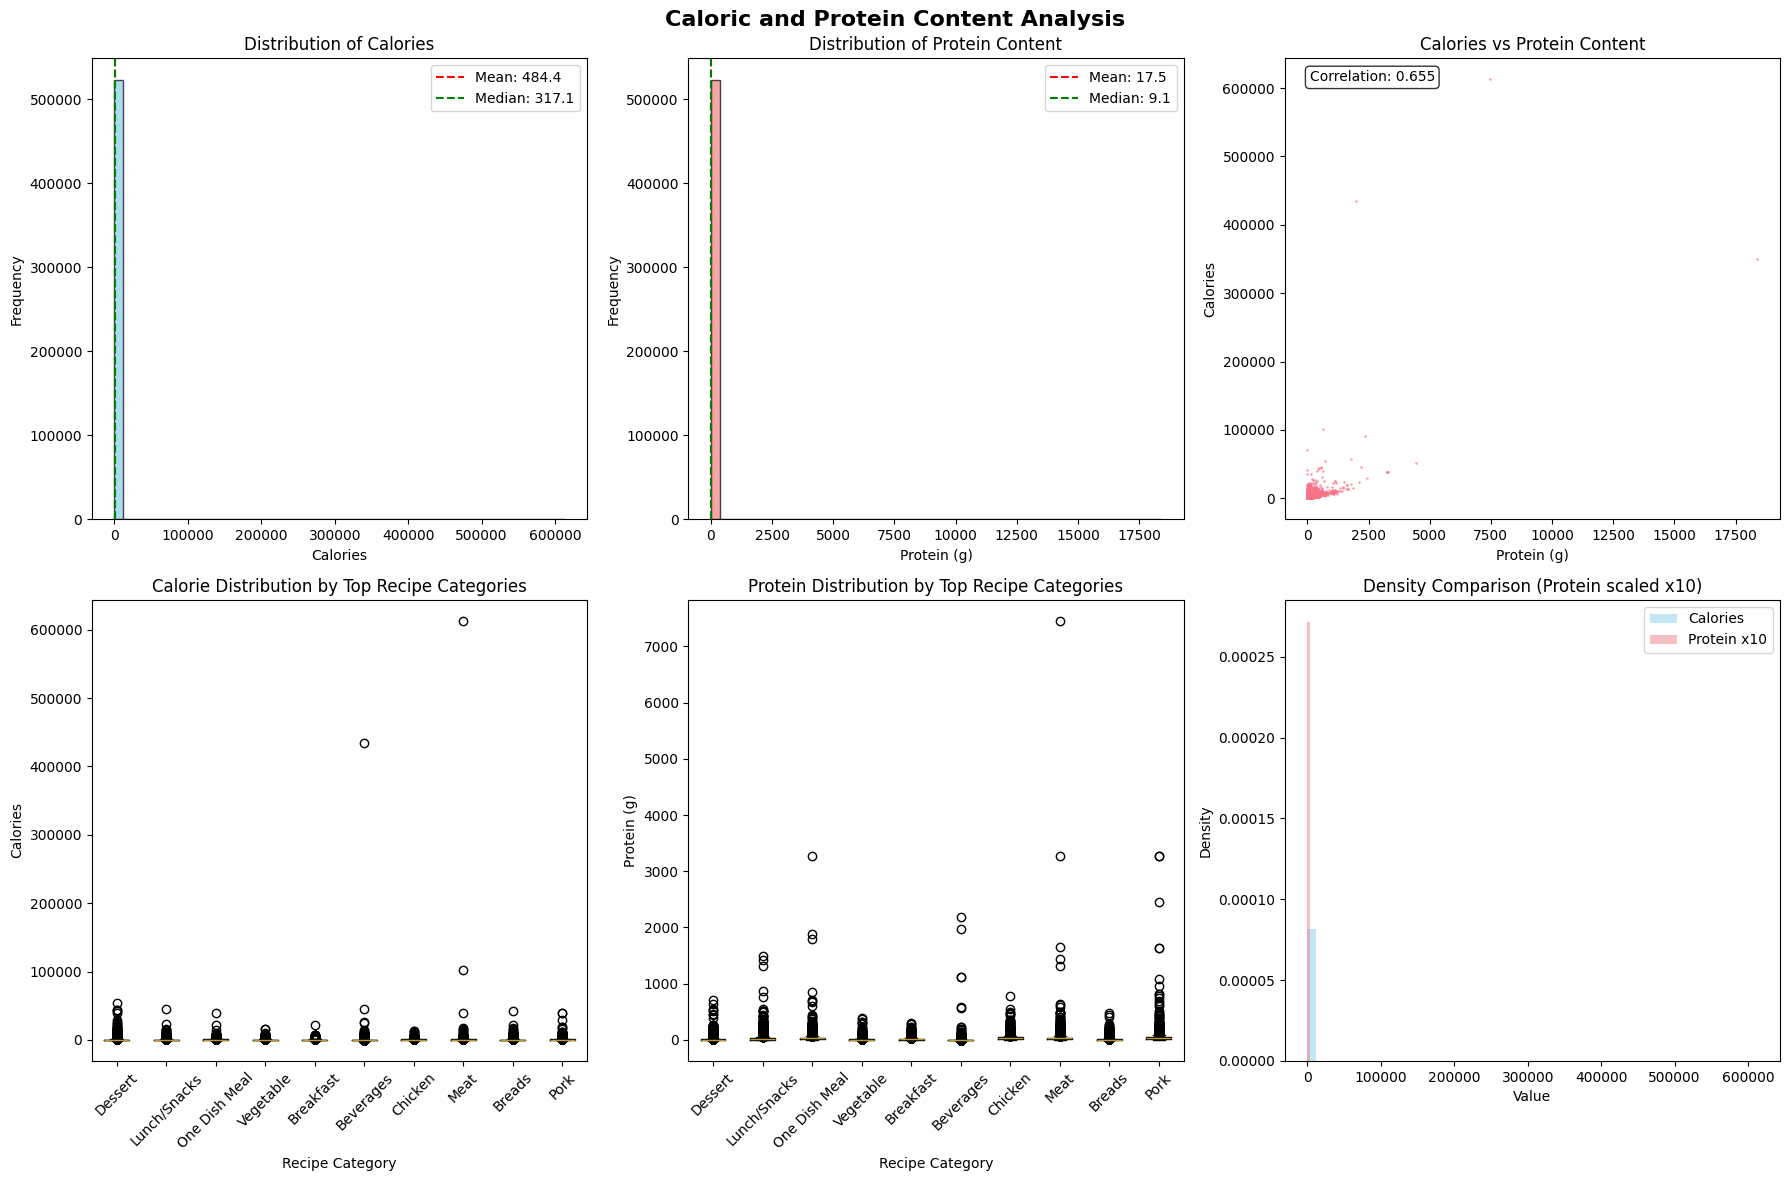

=== CALORIC CONTENT ANALYSIS ===
Mean calories: 484.44
Median calories: 317.10
Standard deviation: 1397.12
Min calories: 0.00
Max calories: 612854.60
25th percentile: 174.20
75th percentile: 529.10
99th percentile: 3642.67

=== PROTEIN CONTENT ANALYSIS ===
Mean protein: 17.47g
Median protein: 9.10g
Standard deviation: 40.13g
Min protein: 0.00g
Max protein: 18396.20g
25th percentile: 3.50g
75th percentile: 25.00g
99th percentile: 95.60g

=== CORRELATION ANALYSIS ===
Correlation between Calories and Protein: 0.6553

=== HIGH CALORIE RECIPES (>1000 calories) ===
Number of high-calorie recipes: 39768 (7.61%)
Average protein in high-calorie recipes: 56.96g

=== HIGH PROTEIN RECIPES (>30g protein) ===
Number of high-protein recipes: 99612 (19.06%)
Average calories in high-protein recipes: 1115.71


In [56]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Caloric and Protein Content Analysis', fontsize=16, fontweight='bold')

# 1. Calorie distribution histogram
axes[0, 0].hist(df['Calories'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Calories')
axes[0, 0].set_xlabel('Calories')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Calories'].mean(), color='red', linestyle='--', label=f'Mean: {df["Calories"].mean():.1f}')
axes[0, 0].axvline(df['Calories'].median(), color='green', linestyle='--', label=f'Median: {df["Calories"].median():.1f}')
axes[0, 0].legend()

# 2. Protein distribution histogram
axes[0, 1].hist(df['ProteinContent'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_title('Distribution of Protein Content')
axes[0, 1].set_xlabel('Protein (g)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['ProteinContent'].mean(), color='red', linestyle='--', label=f'Mean: {df["ProteinContent"].mean():.1f}')
axes[0, 1].axvline(df['ProteinContent'].median(), color='green', linestyle='--', label=f'Median: {df["ProteinContent"].median():.1f}')
axes[0, 1].legend()

# 3. Scatter plot: Calories vs Protein
axes[0, 2].scatter(df['ProteinContent'], df['Calories'], alpha=0.5, s=1)
axes[0, 2].set_title('Calories vs Protein Content')
axes[0, 2].set_xlabel('Protein (g)')
axes[0, 2].set_ylabel('Calories')

# Add correlation coefficient
correlation = df['Calories'].corr(df['ProteinContent'])
axes[0, 2].text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=axes[0, 2].transAxes, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 4. Box plots for calories by recipe category (top 10 categories)
top_categories = df['RecipeCategory'].value_counts().head(10).index
df_top_cat = df[df['RecipeCategory'].isin(top_categories)]
axes[1, 0].boxplot([df_top_cat[df_top_cat['RecipeCategory'] == cat]['Calories'].values 
                    for cat in top_categories], labels=top_categories)
axes[1, 0].set_title('Calorie Distribution by Top Recipe Categories')
axes[1, 0].set_xlabel('Recipe Category')
axes[1, 0].set_ylabel('Calories')
axes[1, 0].tick_params(axis='x', rotation=45)

# 5. Box plots for protein by recipe category (top 10 categories)
axes[1, 1].boxplot([df_top_cat[df_top_cat['RecipeCategory'] == cat]['ProteinContent'].values 
                    for cat in top_categories], labels=top_categories)
axes[1, 1].set_title('Protein Distribution by Top Recipe Categories')
axes[1, 1].set_xlabel('Recipe Category')
axes[1, 1].set_ylabel('Protein (g)')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. Calorie and protein density plots
axes[1, 2].hist(df['Calories'], bins=50, alpha=0.5, density=True, label='Calories', color='skyblue')
axes[1, 2].hist(df['ProteinContent']*10, bins=50, alpha=0.5, density=True, label='Protein x10', color='lightcoral')
axes[1, 2].set_title('Density Comparison (Protein scaled x10)')
axes[1, 2].set_xlabel('Value')
axes[1, 2].set_ylabel('Density')
axes[1, 2].legend()

plt.tight_layout()
plt.show()

# Print detailed statistics
print("=== CALORIC CONTENT ANALYSIS ===")
print(f"Mean calories: {df['Calories'].mean():.2f}")
print(f"Median calories: {df['Calories'].median():.2f}")
print(f"Standard deviation: {df['Calories'].std():.2f}")
print(f"Min calories: {df['Calories'].min():.2f}")
print(f"Max calories: {df['Calories'].max():.2f}")
print(f"25th percentile: {df['Calories'].quantile(0.25):.2f}")
print(f"75th percentile: {df['Calories'].quantile(0.75):.2f}")
print(f"99th percentile: {df['Calories'].quantile(0.99):.2f}")

print("\n=== PROTEIN CONTENT ANALYSIS ===")
print(f"Mean protein: {df['ProteinContent'].mean():.2f}g")
print(f"Median protein: {df['ProteinContent'].median():.2f}g")
print(f"Standard deviation: {df['ProteinContent'].std():.2f}g")
print(f"Min protein: {df['ProteinContent'].min():.2f}g")
print(f"Max protein: {df['ProteinContent'].max():.2f}g")
print(f"25th percentile: {df['ProteinContent'].quantile(0.25):.2f}g")
print(f"75th percentile: {df['ProteinContent'].quantile(0.75):.2f}g")
print(f"99th percentile: {df['ProteinContent'].quantile(0.99):.2f}g")

print("\n=== CORRELATION ANALYSIS ===")
print(f"Correlation between Calories and Protein: {df['Calories'].corr(df['ProteinContent']):.4f}")

print("\n=== HIGH CALORIE RECIPES (>1000 calories) ===")
high_cal = df[df['Calories'] > 1000]
print(f"Number of high-calorie recipes: {len(high_cal)} ({len(high_cal)/len(df)*100:.2f}%)")
print(f"Average protein in high-calorie recipes: {high_cal['ProteinContent'].mean():.2f}g")

print("\n=== HIGH PROTEIN RECIPES (>30g protein) ===")
high_protein = df[df['ProteinContent'] > 30]
print(f"Number of high-protein recipes: {len(high_protein)} ({len(high_protein)/len(df)*100:.2f}%)")
print(f"Average calories in high-protein recipes: {high_protein['Calories'].mean():.2f}")

In [9]:
pd.set_option('display.max_columns', None) # Show all columns in the df, to see the name of the keywords category
df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""4"", ""1/4"", ""1"", ""1"")","c(""blueberries"", ""granulated sugar"", ""vanilla ...",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...","c(""saffron"", ""milk"", ""hot green chili peppers""...",3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""46"", ""4"", ""1"", ""2"", ""1"")","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [41]:
# Count the unique values in keywords
print(df['Keywords'].nunique())
df['Keywords'].value_counts().head(20)

199307


Keywords
"Easy"                                                                 11311
"< 60 Mins"                                                             8983
c("< 15 Mins", "Easy")                                                  8979
"< 4 Hours"                                                             6248
"< 30 Mins"                                                             5703
c("< 30 Mins", "Easy")                                                  5289
c("< 60 Mins", "Easy")                                                  4650
c("< 4 Hours", "Easy")                                                  2884
"< 15 Mins"                                                             2471
c("Low Protein", "Low Cholesterol", "Healthy", "< 15 Mins", "Easy")     1344
c("Meat", "< 60 Mins")                                                  1292
c("Meat", "< 4 Hours")                                                  1184
c("Vegetable", "< 60 Mins")                                        

In [14]:
Keywords = df["Keywords"].str.split(",")

In [15]:
Keywords[2]

['c("Low Protein"',
 ' "Low Cholesterol"',
 ' "Healthy"',
 ' "Summer"',
 ' "< 60 Mins")']

In [10]:
from collections import Counter

# Extract all unique keywords from the dataset
all_keywords = []

# Process each recipe's keywords
for keywords_str in df['Keywords'].dropna():
    if keywords_str.startswith('c('):
        # Remove 'c(' prefix and ')' suffix
        keywords_clean = keywords_str[2:-1]
        
        # Split by '", "' and clean each keyword
        keywords_list = keywords_clean.split('", "')
        
        # Remove quotes from first and last items
        if keywords_list:
            keywords_list[0] = keywords_list[0].lstrip('"')
            keywords_list[-1] = keywords_list[-1].rstrip('"')
        
        all_keywords.extend(keywords_list)

# Get unique keywords and sort them
unique_keywords = sorted(set(all_keywords))

# Display results
print(f"Total unique keywords: {len(unique_keywords)}")
print(f"\nFirst 20 keywords:")
for i, keyword in enumerate(unique_keywords[:20], 1):
    print(f"{i}. {keyword}")

print(f"\nLast 20 keywords:")
for i, keyword in enumerate(unique_keywords[-20:], len(unique_keywords)-19):
    print(f"{i}. {keyword}")

# Show most common keywords
keyword_counts = Counter(all_keywords)
print(f"\nTop 20 most common keywords:")
for keyword, count in keyword_counts.most_common(20):
    print(f"{keyword}: {count}")


Total unique keywords: 311

First 20 keywords:
1. < 15 Mins
2. < 30 Mins
3. < 4 Hours
4. < 60 Mins
5. African
6. Apple
7. Artichoke
8. Asian
9. Australian
10. Austrian
11. Avocado
12. Baked Beans
13. Baking
14. Bar Cookie
15. Bass
16. Bath/Beauty
17. Bean Soup
18. Beans
19. Bear
20. Beef Crock Pot

Last 20 keywords:
292. Tuna
293. Turkey Breasts
294. Turkish
295. Veal
296. Vegan
297. Vegetable
298. Venezuelan
299. Very Low Carbs
300. Vietnamese
301. Weeknight
302. Welsh
303. White Rice
304. Whitefish
305. Whole Chicken
306. Whole Duck
307. Whole Turkey
308. Wild Game
309. Winter
310. Yam/Sweet Potato
311. Yeast Breads

Top 20 most common keywords:
Easy: 264469
< 60 Mins: 139800
< 30 Mins: 106014
< 4 Hours: 104007
Meat: 102578
< 15 Mins: 86577
Healthy: 83196
Vegetable: 81159
Low Cholesterol: 74093
Beginner Cook: 67092
Inexpensive: 65812
Low Protein: 63925
Fruit: 60494
Oven: 54116
Kid Friendly: 51289
European: 47022
Poultry: 46278
Weeknight: 44765
Dessert: 43104
For Large Groups: 40572


We see that there are 311 unique keywords, this will be helpful to manage the dietary preferences later on

In [17]:
# Count frequency of each keyword in the Keywords column
keyword_frequency = {}

# Process each recipe's keywords
for keywords_str in df['Keywords'].dropna():
    if keywords_str.startswith('c('):
        # Remove 'c(' prefix and ')' suffix
        keywords_clean = keywords_str[2:-1]
        
        # Split by '", "' and clean each keyword
        keywords_list = keywords_clean.split('", "')
        
        # Remove quotes from all items properly
        keywords_list = [keyword.strip().strip('"') for keyword in keywords_list]
        
        # Count each keyword (only non-empty ones)
        for keyword in keywords_list:
            if keyword:  # Only add non-empty keywords
                keyword_frequency[keyword] = keyword_frequency.get(keyword, 0) + 1

# Convert to sorted list of tuples for better visualization
keyword_freq_sorted = sorted(keyword_frequency.items(), key=lambda x: x[1], reverse=True)

print(f"=== KEYWORD FREQUENCY ANALYSIS ===")
print(f"Total unique keywords found: {len(keyword_frequency)}")
print(f"Total recipes with keywords: {df['Keywords'].notna().sum()}")
print(f"\nTop 30 most frequent keywords:")
print("-" * 50)

for i, (keyword, freq) in enumerate(keyword_freq_sorted[:30], 1):
    percentage = (freq / len(df)) * 100
    print(f"{i:2d}. {keyword:<25} {freq:>6,} ({percentage:5.2f}%)")

print(f"\nBottom 20 least frequent keywords:")
print("-" * 50)

for i, (keyword, freq) in enumerate(keyword_freq_sorted[-20:], len(keyword_freq_sorted)-19):
    percentage = (freq / len(df)) * 100
    print(f"{i:2d}. {keyword:<25} {freq:>6,} ({percentage:5.2f}%)")

# Summary statistics
frequencies = list(keyword_frequency.values())
print(f"\n=== KEYWORD FREQUENCY STATISTICS ===")
print(f"Mean frequency: {sum(frequencies)/len(frequencies):.2f}")
print(f"Median frequency: {sorted(frequencies)[len(frequencies)//2]:.2f}")
print(f"Most frequent keyword: '{keyword_freq_sorted[0][0]}' ({keyword_freq_sorted[0][1]:,} times)")
print(f"Least frequent keywords: {sum(1 for freq in frequencies if freq == 1)} keywords appear only once")


=== KEYWORD FREQUENCY ANALYSIS ===
Total unique keywords found: 311
Total recipes with keywords: 505280

Top 30 most frequent keywords:
--------------------------------------------------
 1. Easy                      264,469 (50.61%)
 2. < 60 Mins                 139,800 (26.76%)
 3. < 30 Mins                 106,014 (20.29%)
 4. < 4 Hours                 104,007 (19.90%)
 5. Meat                      102,578 (19.63%)
 6. < 15 Mins                 86,577 (16.57%)
 7. Healthy                   83,196 (15.92%)
 8. Vegetable                 81,159 (15.53%)
 9. Low Cholesterol           74,093 (14.18%)
10. Beginner Cook             67,092 (12.84%)
11. Inexpensive               65,812 (12.60%)
12. Low Protein               63,925 (12.23%)
13. Fruit                     60,494 (11.58%)
14. Oven                      54,116 (10.36%)
15. Kid Friendly              51,289 ( 9.82%)
16. European                  47,022 ( 9.00%)
17. Poultry                   46,278 ( 8.86%)
18. Weeknight             

Clearly some of the keywords overlap. By using logic every meal which is < 15 minutes should also be < 4 Hours but this is not always encoded. That should not be too big of a problem.

In [12]:
# Count frequency of each ingredient in the RecipeIngredientParts column
ingredient_frequency = {}

# Process each recipe's ingredients
for ingredients_str in df['RecipeIngredientParts'].dropna():
    if ingredients_str.startswith('c('):
        # Remove 'c(' prefix and ')' suffix
        ingredients_clean = ingredients_str[2:-1]
        
        # Split by '", "' and clean each ingredient
        ingredients_list = ingredients_clean.split('", "')
        
        # Remove quotes from first and last items properly
        if ingredients_list:
            # Remove leading quote from first item
            ingredients_list[0] = ingredients_list[0].lstrip('"')
            # Remove trailing quote from last item
            ingredients_list[-1] = ingredients_list[-1].rstrip('"')
        
        # Count each ingredient (convert to lowercase to avoid overlap)
        for ingredient in ingredients_list:
            # Clean any remaining quotes and whitespace
            ingredient_clean = ingredient.strip().strip('"').lower()
            if ingredient_clean:  # Only add non-empty ingredients
                ingredient_frequency[ingredient_clean] = ingredient_frequency.get(ingredient_clean, 0) + 1

# Convert to sorted list of tuples for better visualization
ingredient_freq_sorted = sorted(ingredient_frequency.items(), key=lambda x: x[1], reverse=True)

print(f"=== INGREDIENT FREQUENCY ANALYSIS ===")
print(f"Total unique ingredients found: {len(ingredient_frequency)}")
print(f"Total recipes with ingredients: {df['RecipeIngredientParts'].notna().sum()}")
print(f"\nTop 30 most frequent ingredients:")
print("-" * 50)

for i, (ingredient, freq) in enumerate(ingredient_freq_sorted[:30], 1):
    percentage = (freq / len(df)) * 100
    print(f"{i:2d}. {ingredient:<25} {freq:>6,} ({percentage:5.2f}%)")

print(f"\nBottom 20 least frequent ingredients:")
print("-" * 50)

for i, (ingredient, freq) in enumerate(ingredient_freq_sorted[-20:], len(ingredient_freq_sorted)-19):
    percentage = (freq / len(df)) * 100
    print(f"{i:2d}. {ingredient:<25} {freq:>6,} ({percentage:5.2f}%)")

# Summary statistics
frequencies = list(ingredient_frequency.values())
print(f"\n=== INGREDIENT FREQUENCY STATISTICS ===")
print(f"Mean frequency: {sum(frequencies)/len(frequencies):.2f}")
print(f"Median frequency: {sorted(frequencies)[len(frequencies)//2]:.2f}")
print(f"Most frequent ingredient: '{ingredient_freq_sorted[0][0]}' ({ingredient_freq_sorted[0][1]:,} times)")
print(f"Least frequent ingredients: {sum(1 for freq in frequencies if freq == 1)} ingredients appear only once")

=== INGREDIENT FREQUENCY ANALYSIS ===
Total unique ingredients found: 7364
Total recipes with ingredients: 522517

Top 30 most frequent ingredients:
--------------------------------------------------
 1. salt                      199,713 (38.22%)
 2. butter                    135,863 (26.00%)
 3. sugar                     115,695 (22.14%)
 4. onion                     87,519 (16.75%)
 5. water                     83,958 (16.07%)
 6. eggs                      81,084 (15.52%)
 7. olive oil                 76,643 (14.67%)
 8. flour                     62,378 (11.94%)
 9. milk                      61,043 (11.68%)
10. garlic cloves             59,594 (11.41%)
11. pepper                    49,787 ( 9.53%)
12. all-purpose flour         43,653 ( 8.35%)
13. brown sugar               42,564 ( 8.15%)
14. egg                       39,719 ( 7.60%)
15. baking powder             39,542 ( 7.57%)
16. garlic                    35,673 ( 6.83%)
17. vanilla                   33,238 ( 6.36%)
18. baking soda

In [48]:
df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""4"", ""1/4"", ""1"", ""1"")","c(""blueberries"", ""granulated sugar"", ""vanilla ...",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...","c(""saffron"", ""milk"", ""hot green chili peppers""...",3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""46"", ""4"", ""1"", ""2"", ""1"")","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [ ]:
df.isnull().sum()/ len(df) * 100 # the percentage of missing values in each column

RecipeId                       0.000000
Name                           0.000000
AuthorId                       0.000000
AuthorName                     0.000000
CookTime                      15.727335
PrepTime                       0.000000
TotalTime                      0.000000
DatePublished                  0.000000
Description                    0.000842
Images                         0.000210
RecipeCategory                 0.132773
Keywords                       3.283752
RecipeIngredientQuantities     0.000631
RecipeIngredientParts          0.000000
AggregatedRating              48.271327
ReviewCount                   47.205570
Calories                       0.000000
FatContent                     0.000000
SaturatedFatContent            0.000000
CholesterolContent             0.000000
SodiumContent                  0.000000
CarbohydrateContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
ProteinContent                 0.000000


### Encoding

There clearly is value to be gained from introducing some form of encoding. This will enable to effectively filter the desired features of a meal in the final versions of the app.

In [ ]:
#Here I will start with encoding the Easy category in a new column

df['Keywords'] = df['Keywords'].str.strip('c()').str.replace('"', '', regex=False) # We clean up the categories column

df = df.dropna(subset=['Keywords']).reset_index(drop=True) # removing the entries with missing values in the Keyword column and reseting the indexes
easy_encoding = np.zeros(len(df))

for i in range(len(df)):
    if ' Easy' in df['Keywords'][i].split(','):
        easy_encoding[i] = 1
    else:
        easy_encoding[i] = 0
df['Easy'] = easy_encoding

0.5220986383800569


In [55]:
sum(df_keywords['Easy'])

0

In [2]:
test = "mamaguevissimo"
test.split(',')

['mamaguevissimo']